In [1]:
from xraycam.nbinit import *
camcontrol.set_detector('zwo')
from xraycam.camalysis import *

Process Process-2:
Traceback (most recent call last):
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/multiprocess-0.70.4-py3.5-linux-x86_64.egg/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/multiprocess-0.70.4-py3.5-linux-x86_64.egg/multiprocess/process.py", line 254, in _bootstrap
    self.run()
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/xraycam-0.0.0-py3.5.egg/xraycam/zwo.py", line 85, in sink_process
    zmq_comm.start_sink_routine(sink_function)
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/xraycam-0.0.0-py3.5.egg/xraycam/zmq_comm.py", line 82, in start_sink_routine
    receiver.bind(sink_addr)
  File "zmq/backend/cython/socket.pyx", line 487, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:5156)
zmq.error.ZMQError: Address already in use
  File "zmq/backend/cython/checkrc.pxd", line 2

In [2]:
class Monitor:
    def __init__(self, *args, transpose = True, vmax = 150, rebin = 1, **kwargs):
        self.run = camcontrol.DataRun(*args, **kwargs)
        self.vmax = vmax
        self.rebin = rebin

    def frame(self):a
        return self.run.get_frame()
    
    def update(self):
        self.run.show(vmax = self.vmax)
        self.run.plot_lineout(rebin = self.rebin)
        self.frame().plot_histogram(xmin = 0, xmax = self.vmax)
        
    def stop(self):
        self.run.stop()

IndentationError: unexpected indent (<ipython-input-2-ed3cd8d76a6a>, line 8)

### Monitor instance

In [14]:
data0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.data0')

In [19]:
data0.run.acquisition_time()

122.08265852928162

In [24]:
data0.run.counts_per_second()

1.7356706448134545

In [23]:
data0.stop()

<IPython.core.display.Javascript object>


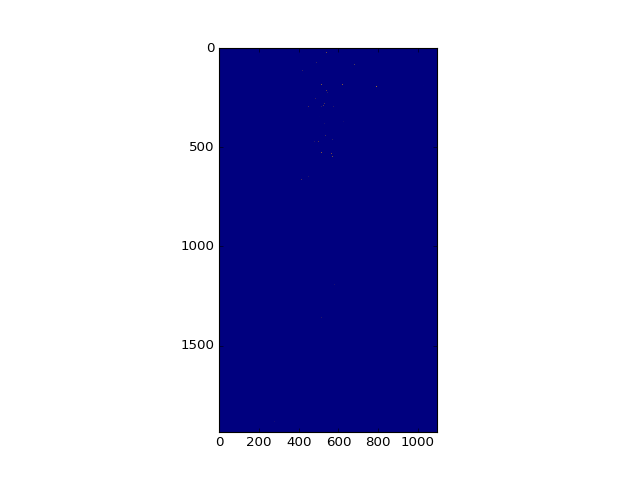

In [18]:
data0.update()

<IPython.core.display.Javascript object>


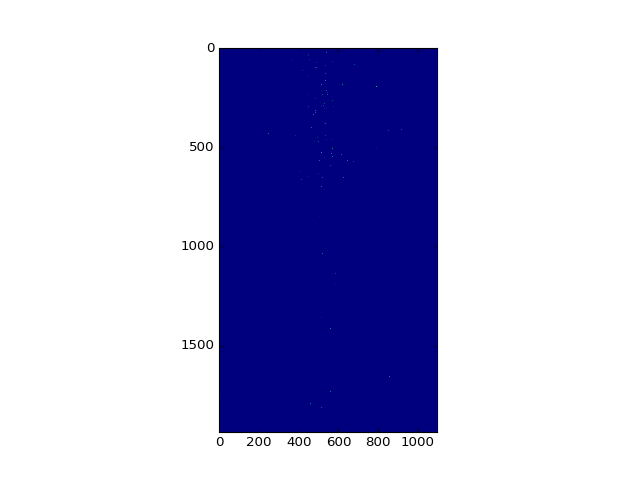

In [22]:
data0.run.show(vmax=250)

In [20]:
data0.run.plot_lineout(rebin=5)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   1.03636364,
         0.        ,   0.        ,   2.00909091,   0.        ,
         0.95454545,   0.        ,   0.98181818,   2.03636364,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.94545455,   0.        ,
         0.        ,   0.95454545,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   1.00909091,
         0.99090909,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   1.93636364,
         1.00909091,   0.97272727,   0.97272727,   1.  

### RunSet instance

In [3]:
gaprunset0 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.gaprunset0',htime="1m",number_runs=5)

starting acquisition


In [8]:
[x.counts_per_second() for x in gaprunset0.dataruns]

KeyboardInterrupt: 

In [7]:
gaprunset0.dataruns[0].counts_per_second()

1.4516658492868604

stopped acquisistion
starting acquisition


In [6]:
gaprunset0.dataruns[0].plot_lineout()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

<IPython.core.display.Javascript object>


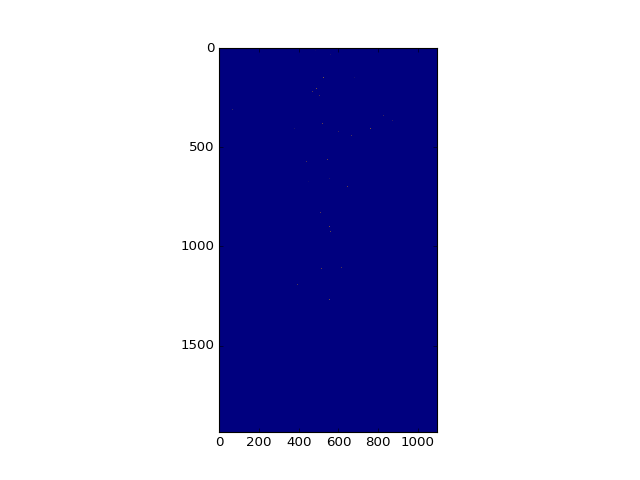

In [13]:
gaprunset0.dataruns[1].show(vmax=250)

### Check parabolic fitting

In [ ]:
plot_with_energy_scale(cds0.run,2300,known_bin=None,label='parabola',rebin=1,
                           xrange=[0,-1],yrange = [0,-1], show=False,calcfwhm=True,peaknormalize=True,parabolic=True)
plt.show()

# Got counts ~1.5/sec, start optimizing angle

In [92]:
def counts_vs_theta(dataruntuple,**kwargs):
    plt.plot(*list(zip(*[(x.run.theta,x.run.counts_per_second()) for x in 
                     dataruntuple])),label='counts v theta')
    plt.show()

In [3]:
gapangle0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gapangle0',htime = '2m')
gapangle0.theta=325

starting acquisition


In [17]:
gapangle1 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gapangle1',htime = '2m')
gapangle1.theta=330

starting acquisition


In [48]:
gapangle2 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gapangle2',htime = '2m')
gapangle2.theta=320

starting acquisition


In [61]:
gapangle3 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gapangle3',htime = '2m')
gapangle3.theta=315

starting acquisition


In [68]:
gapangle4 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gapangle4',htime = '2m')
gapangle4.theta=310

starting acquisition


In [75]:
gapangle5 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.gapangle5',htime = '2m')
gapangle5.theta=305

starting acquisition


In [80]:
gapangle5.run.counts_per_second()

0.01178491340609614

stopped acquisistion


In [82]:
gapangle5.run.acquisition_time()

120.16528296470642

In [72]:
[x.run.plot_lineout(rebin=5,show=False) for x in (gapangle0,gapangle2,gapangle3,gapangle4)]
plt.show()

In [63]:
_ = gapangle3.run.plot_lineout(rebin=5)

In [84]:
[x.run.counts_per_second() for x in (gapangle0,gapangle2,gapangle3,gapangle4,gapangle5)]

[2.8710059670418437,
 6.1361810152162128,
 7.9932314549455867,
 7.5422328936604046,
 0.0083975245111958651]

In [93]:
counts_vs_theta(dataruntuple)

AttributeError: 'DataRun' object has no attribute 'theta'

In [85]:
dataruntuple=(gapangle0,gapangle2,gapangle3,gapangle4,gapangle5)

<IPython.core.display.Javascript object>


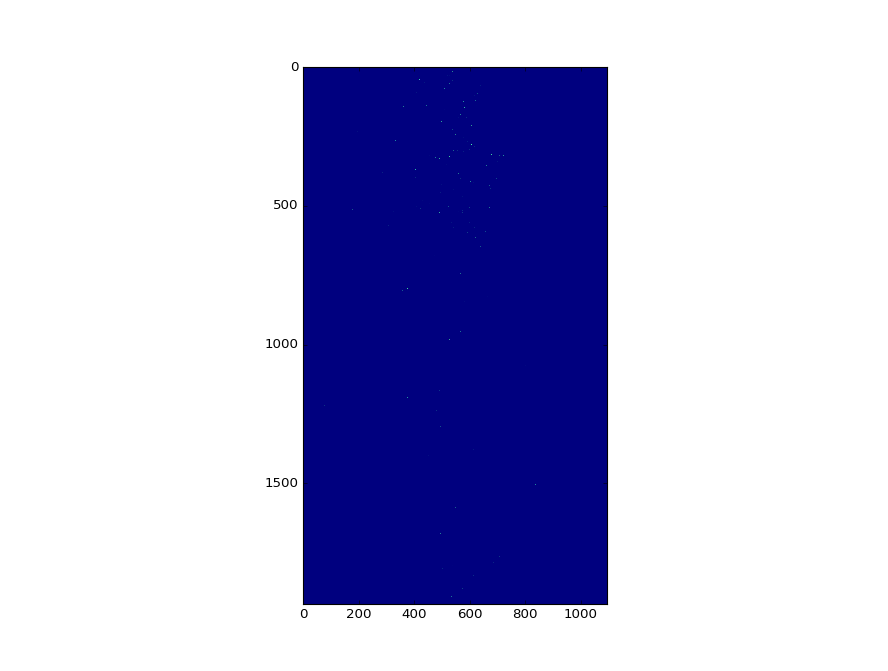

<IPython.core.display.Javascript object>


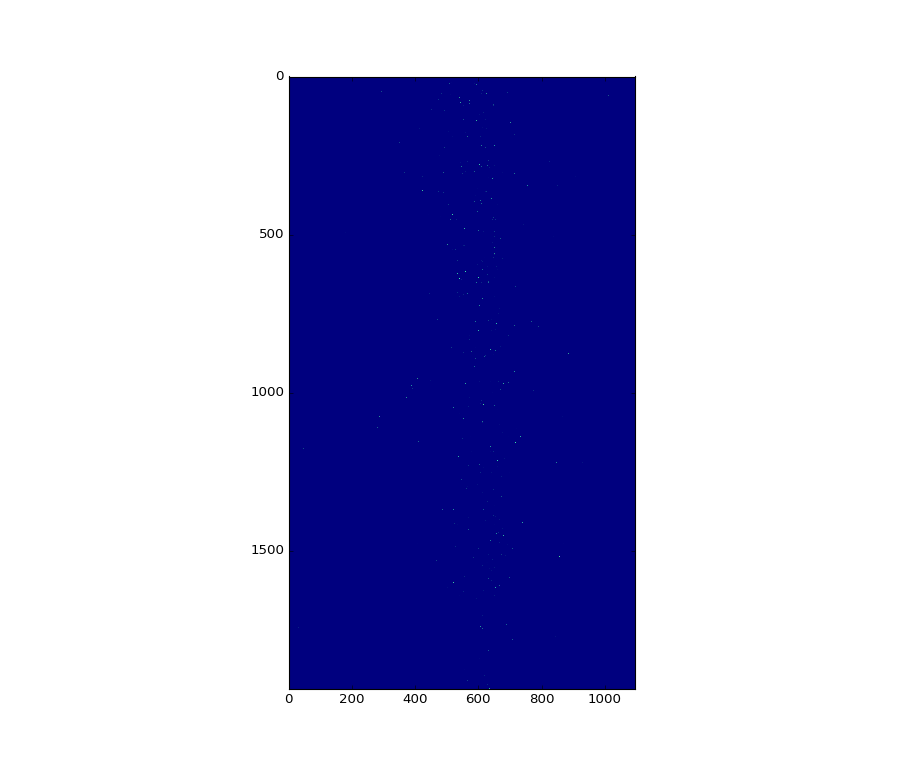

<IPython.core.display.Javascript object>


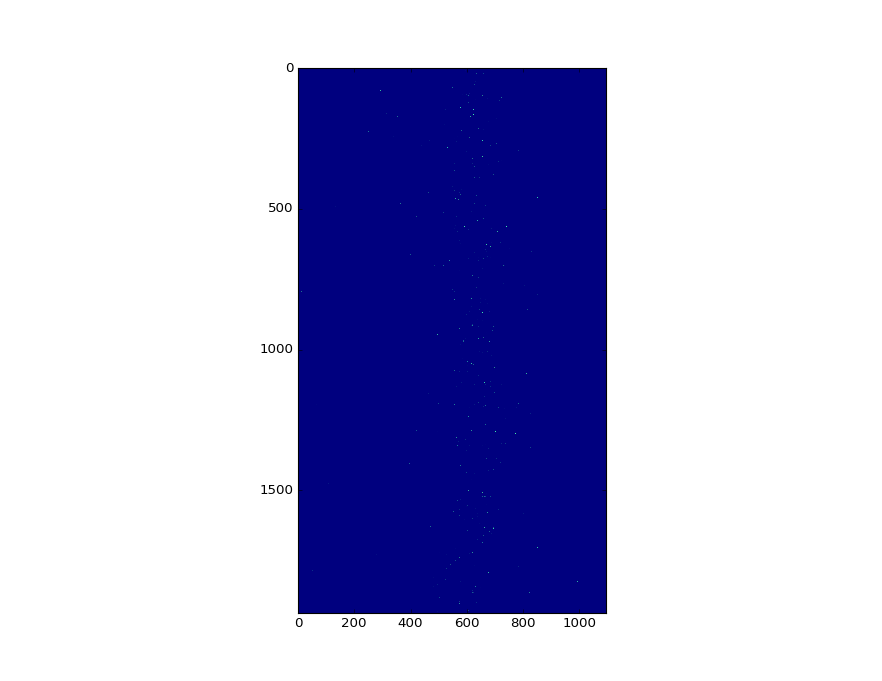

<IPython.core.display.Javascript object>


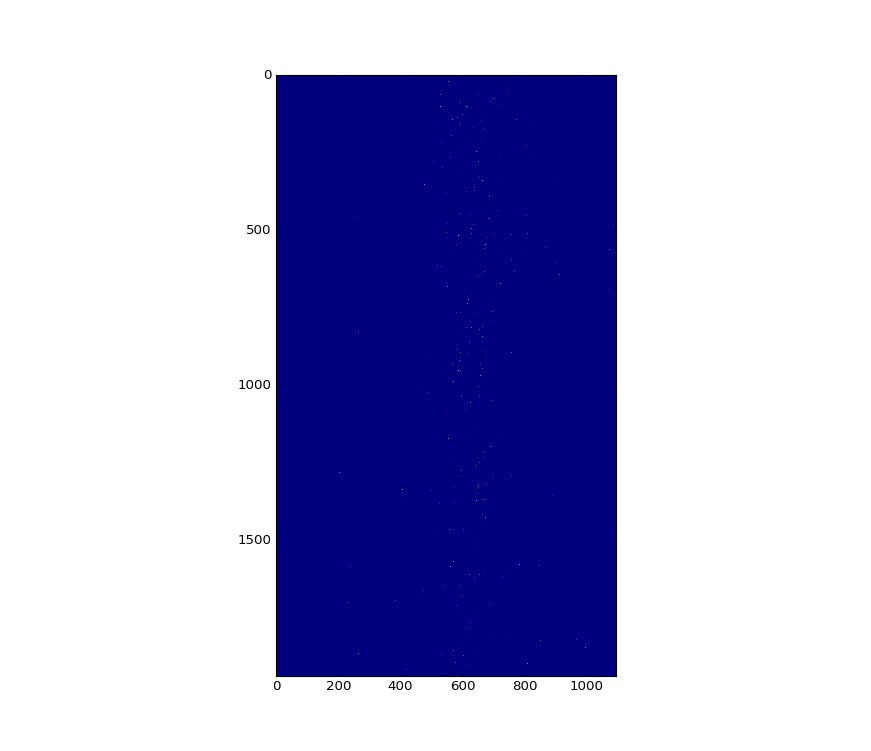

<IPython.core.display.Javascript object>


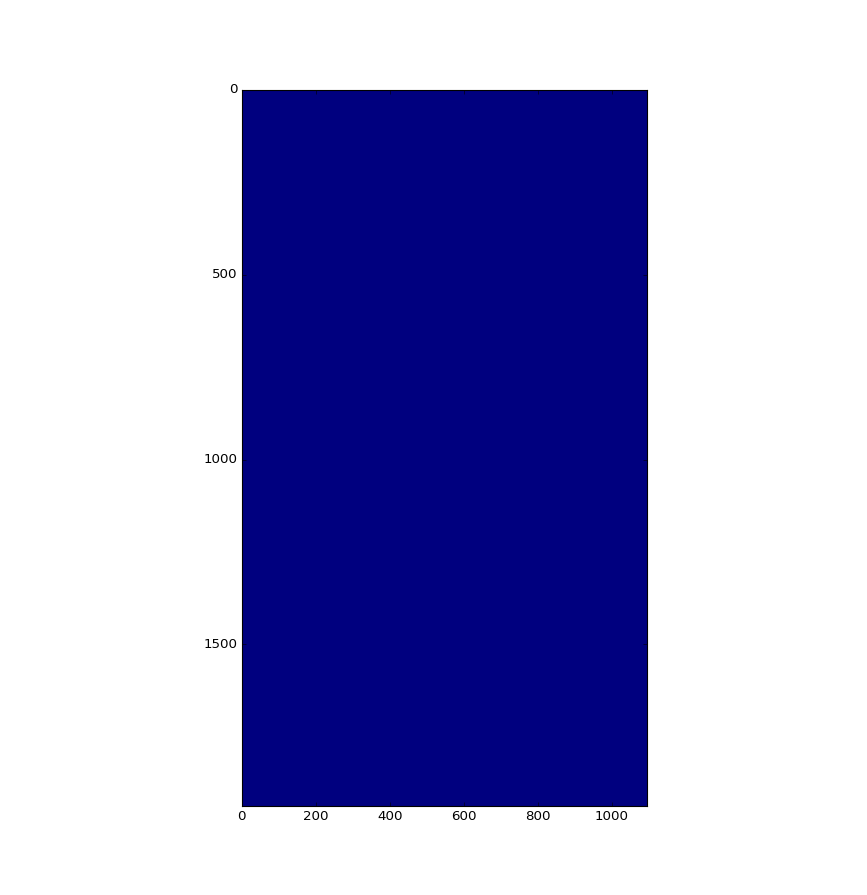

[None, None, None, None, None]

In [86]:
[x.run.show(vmax=250) for x in dataruntuple]

# OKay best counts at theta=315deg, take longer exposure

In [3]:
gaprunset1 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.gaprunset1',htime="5m",number_runs=24)

Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.


In [4]:
gaprunset1.dataruns[0].counts_per_second()

8.0184312370808666

In [97]:
_ = gaprunset1.dataruns[0].plot_lineout(rebin=5)

In [109]:
plot_with_energy_scale(gaprunset1.dataruns[0],2015,known_bin=None,label='GaP',rebin=5,
                           xrange=[0,-1],yrange = [0,-1], show=False,calcfwhm=True,peaknormalize=False)
plot_with_energy_scale(gaprunset1.dataruns[1],2015,known_bin=None,label='GaP',rebin=5,
                           xrange=[0,-1],yrange = [0,-1], show=False,calcfwhm=True,peaknormalize=False)
plt.show()

stopped acquisistion
starting acquisition


In [113]:
gaprunset1.dataruns[2].acquisition_time()

28.301879405975342

In [115]:
[gaprunset1.dataruns[i].counts_per_second() for i in (0,1,2)]

[8.0184312370808666, 8.1349562263001953, 7.9462246960581462]

In [136]:
plt.plot(np.sum(np.add([gaprunset1.dataruns[i].get_array() for i in range(0,10)]),axis=1)/110)
plt.show()

ValueError: invalid number of arguments

In [180]:
np.shape(datarr)

(1936, 1096)

In [184]:
from scipy.ndimage.filters import gaussian_filter as gfilt

In [228]:
cmplot(datarr,smooth=10)

In [13]:
from xraycam.camcontrol import _rebin_spectrum

In [14]:
def rebin_spc(arr2d,rebin=5):
    lineout = np.sum(arr2d,axis=0)/110
    return _rebin_spectrum(np.array(range(len(lineout))),lineout,rebin)[1]

stopped acquisistion


In [195]:
plt.plot(rebin_spc(datarr))
plt.show()

In [151]:
plt.plot(np.sum([np.sum(gaprunset1.dataruns[i].get_array(),axis=1) for i in range(0,15)],axis=0)/110)
plt.show()

In [157]:
_reorient_array?

Object `_reorient_array` not found.


In [15]:
def _reorient_array(arr2d):
    """Take output from the get_array() method for dataruns from the new camera,
    and reorient them to match what our usual analysis code expects."""
    return np.transpose(arr2d[::,::-1])

starting acquisition


In [151]:
plt.plot(np.sum([np.sum(gaprunset1.dataruns[i].get_array(),axis=1) for i in range(0,15)],axis=0)/110)
plt.show()

In [217]:
[gaprunset1.dataruns[i].counts_per_second() for i in range(0,22)]

[8.0184312370808666,
 8.1349562263001953,
 7.9465883626343699,
 8.2417046925004307,
 7.9975975833228574,
 7.6575373755473448,
 7.9794992341552451,
 7.6631714010032326,
 7.7440133518008487,
 7.8982731125545325,
 7.4946597096716578,
 8.1729832639455466,
 7.7011388730760482,
 7.8963233219442825,
 7.9422349084865607,
 8.0130453688182932,
 8.0725266384917962,
 8.3938188326440901,
 8.1897169558120222,
 8.1131821130040951,
 8.1878119125529452,
 8.2653529070115361]

In [233]:
[gaprunset1.dataruns[i].acquisition_time() for i in range(0,24)]

[300.1539285182953,
 300.1122479438782,
 300.20430040359497,
 300.1695866584778,
 300.1878743171692,
 300.197389125824,
 300.2056694030762,
 300.20326709747314,
 300.12509298324585,
 300.2014102935791,
 300.1761612892151,
 300.22085213661194,
 300.17402052879333,
 300.2179729938507,
 300.16854429244995,
 300.1616714000702,
 300.21692085266113,
 300.13102555274963,
 300.1779842376709,
 300.1859939098358,
 300.21784806251526,
 300.23466420173645,
 300.11196184158325,
 300.22668170928955]

In [18]:
def plot_with_energy_scale_arr2d(arr2d,known_energy,photon_value=110,yrange=[0,-1],xrange=[0,-1],rebin=1,show=True,peaknormalize=False, label=None,calcfwhm=False,parabolic=False,**kwargs):
    if parabolic == False:
        lineout = np.sum(arr2d[yrange[0]:yrange[1],xrange[0]:xrange[1]],axis=0)/photon_value
    else:
        lineout = get_parabolic_lineout(arr2d,yrange=yrange)[xrange[0]:xrange[1]]/photon_value
    if rebin != 1: #rebin using oliver's rebin_spectrum function
        lineout = _rebin_spectrum(np.array(range(len(lineout))),lineout,rebin)[1]
    if peaknormalize == True:
        lineout = lineout / max(lineout)
    lineout_energyscale=add_energy_scale(lineout,known_energy,rebinparam=rebin,**kwargs)
    if label == None and calcfwhm == False:
        label=datarun.prefix
    elif label == None and calcfwhm == True:
        s=' - '
        label=s.join((str(datarun.prefix),str(fwhm_ev(lineout_energyscale,3))))
    elif label != None and calcfwhm == True:
        s=' - '
        label=s.join((label,str(fwhm_ev(lineout_energyscale))))
    camcontrol.plt.plot(*lineout_energyscale,label=label)
    if show == True:
        camcontrol.plt.show()

In [64]:
plot_with_energy_scale_arr2d(datarr,2015,label="GaP",parabolic=True,rebin=5,show=False,calcfwhm=False,peaknormalize=False)
plot_with_energy_scale_arr2d(datarr,2015,label="GaP",parabolic=False,rebin=2,calcfwhm=False,peaknormalize=False)

In [84]:
plot_with_energy_scale_arr2d(datarr,2015,label="GaP",parabolic=True,rebin=5,show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale_arr2d(datarr,2015,label="GaP",parabolic=True,rebin=5,show=False,yrange=[300,1200],calcfwhm=False,peaknormalize=True)
plt.show()

In [73]:
import matplotlib as mplt

In [75]:
def dofit_will(arr2d,fitregionx = [0,-1], fitregiony = [0,-1],cropregionx = [0,-1], cropregiony = [0,-1]):

    y = center_of_masses(arr2d[fitregiony[0]:fitregiony[1],fitregionx[0]:fitregionx[1]])
    x = np.arange(len(y))
    plt.plot(x, y, label = 'CM lineout')

    a, b, c = quadfit(arr2d[fitregiony[0]:fitregiony[1],fitregionx[0]:fitregionx[1]])
    plt.plot(x, -a * x**2 - b * x - c)
    plt.show()

    # Also the 2d array overlaid with some of the bin-defining parabolas
    #mplt.imshow(arr2d, vmax = 450)
    plt.imshow(arr2d[fitregiony[0]:fitregiony[1],fitregionx[0]:fitregionx[1]], vmax = 450)
    plot_parabolas(arr2d[fitregiony[0]:fitregiony[1],fitregionx[0]:fitregionx[1]], interval = 15)
    mplt.show()
    
    plt.plot(get_parabolic_lineout(arr2d,fitregionx=fitregionx,fitregiony=fitregiony,cropregionx=cropregionx,cropregiony=cropregiony), label = 'parabolic lineout')
    #col_lineout = normlineout(arr2d)
    plt.plot(np.sum(arr2d[cropregiony[0]:cropregiony[1],cropregionx[0]:cropregionx[1]], axis = 0), label = 'column lineout')
    plt.show()

    print(a, b, c) 
    
    return

In [77]:
import matplotlib.pyplot as mplt
def plot_parabolas(arr2d, interval = 10):
    a, b, _ = quadfit(arr2d)
    a, b = -a, -b
    x = np.arange(arr2d.shape[0])
    parabolas = [a * x**2 + b * x + c for c in range(0, arr2d.shape[1], interval)]
    [mplt.plot(p, x) for p in parabolas]

<IPython.core.display.Javascript object>


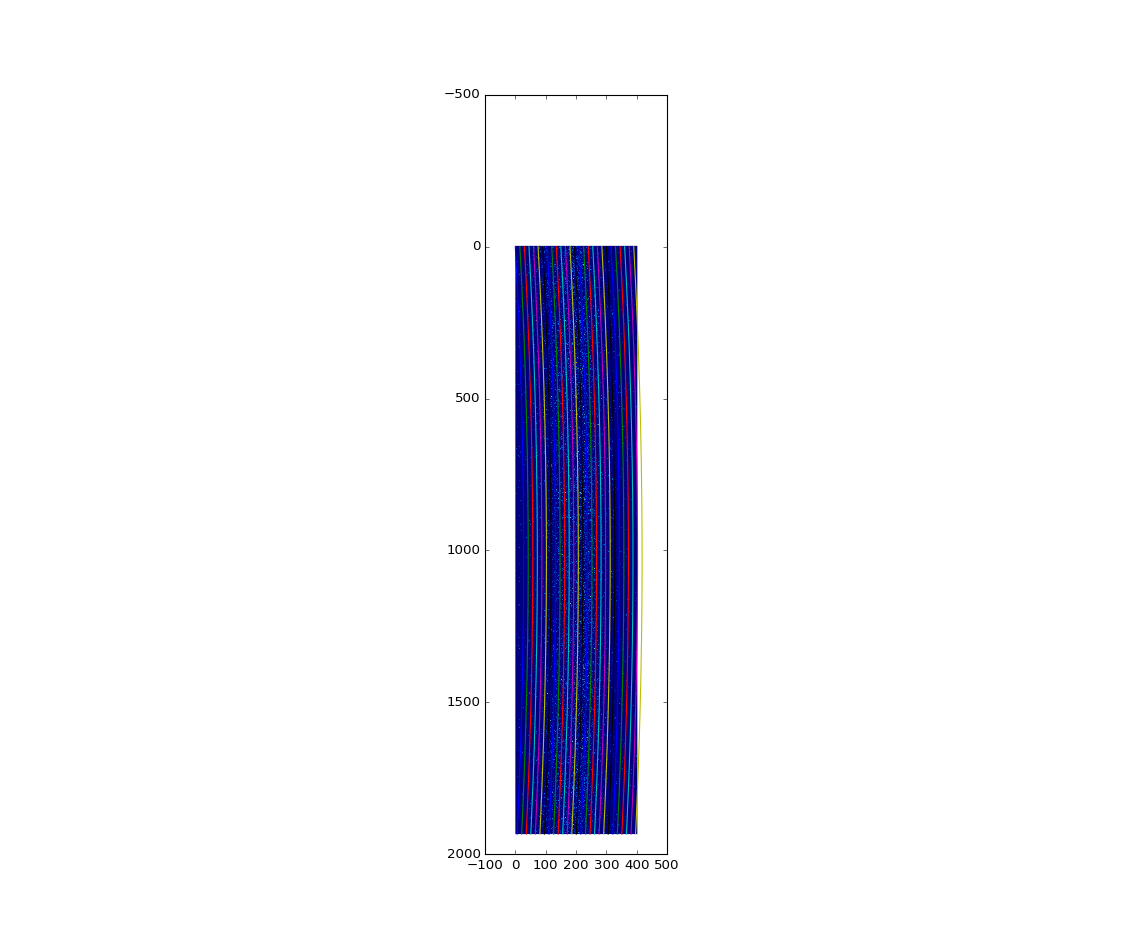

2.61327547459e-05 -0.0535936303583 -173.117980394


In [83]:
dofit_will(datarr,fitregiony=[0,-1],fitregionx=[400,800])

In [16]:
datarr=_reorient_array(np.sum([gaprunset1.dataruns[i].get_array() for i in range(0,20)],axis=0))

<IPython.core.display.Javascript object>


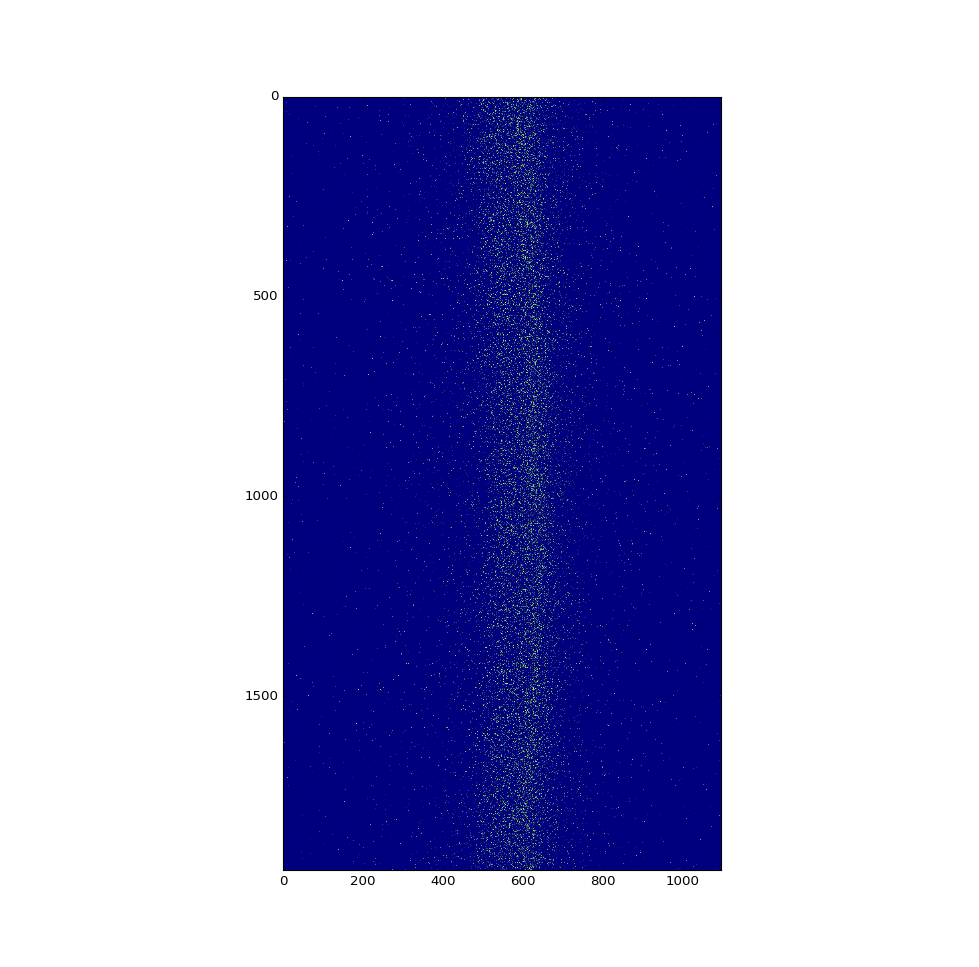

In [52]:
plt.imshow(datarr,vmax=200)
plt.show()

In [43]:
def cropping_tool_arr2d(datarun,step,known_energy=2014,calcfwhm=True,**kwargs):
    [plot_with_energy_scale_arr2d(datarun,known_energy,label='['+','.join((str(i),str(i+step)))+']',yrange=[i,i+step],
                            show=False,calcfwhm=calcfwhm,**kwargs) for i in range(0,2000,step)]
    camcontrol.plt.show()

In [86]:
cropping_tool_arr2d(datarr,400,calcfwhm=False,rebin=3,peaknormalize=True)

# Now check FePO4 count rate

In [234]:
fepocount0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.fepocount0')
fepocount0.run.theta=45

In [3]:
fepocount1 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.21.fepocount1')
fepocount1.run.theta=40

In [6]:
fepocount1.stop()

In [9]:
fepocount1.run.acquisition_time()

64.26637363433838

In [8]:
fepocount1.run.counts_per_second()

2.6370357885290066

In [10]:
fepocount1.run.plot_lineout()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

stopped acquisistion
starting acquisition
stopped acquisistion
starting acquisition


In [270]:
fepocount0.stop()

In [271]:
feporunset0 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.feporunset0',htime="30s",number_runs=20)

starting acquisition


In [7]:
feporunset1 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.feporunset1',htime="30s",number_runs=20)

starting acquisition


In [33]:
[feporunset1.dataruns[i].counts_per_second() for i in range(0,20)]

[2.331097188015987,
 1.8473985070608332,
 3.1312565399908086,
 2.577128620909007,
 14.054501727206896,
 2.4081311013440159,
 14.404953480679371,
 2.9036545025722673,
 2.6354797484231405,
 11.673288277670091,
 12.183039986696839,
 11.744904295344609,
 13.801782830312696,
 3.0534777479228015,
 3.4918093828822836,
 2.4761264450569653,
 2.6976549745603302,
 3.15201269967993,
 11.589075167221662,
 3.1520581528848042]

In [34]:
[feporunset1.dataruns[i].plot_lineout(show=False) for i in range(10,15)]
plt.show()

In [5]:
feporunset1.dataruns[0].plot_lineout(show=False)

NameError: name 'feporunset1' is not defined